<h1>E-Commerce Shipping Data </h1><br>
    Pengiriman Produk Tepat Waktu atau Tidak? Untuk Memenuhi Permintaan Pelanggan E-Commerce

<h2> Tentang Dataset </h2> <br>
<b>Konteks</b> <br>
Sebuah perusahaan e-commerce internasional ingin menemukan wawasan utama dari basis data pelanggan mereka. Mereka ingin menggunakan beberapa teknik pembelajaran mesin paling canggih untuk mempelajari pelanggan mereka. Perusahaan tersebut menjual produk elektronik. <br><br>
<b>Konten</b><br>
Kumpulan data yang digunakan untuk membangun model berisi 10.999 observasi dari 12 variabel.<br>
Data berisi informasi berikut:<br><br>

<b>ID:</b> ID Jumlah Pelanggan.<br>
<b>Blok gudang:</b> Perusahaan memiliki gudang besar yang dibagi menjadi blok seperti A, B, C, D, E.<br>
<b>Mode pengiriman:</b> Perusahaan mengirimkan produk dengan berbagai cara seperti Kapal, Penerbangan, dan Darat.<br>
<b>Panggilan layanan pelanggan:</b> Jumlah panggilan yang dibuat untuk menanyakan pengiriman.<br>
<b>Peringkat pelanggan:</b> Perusahaan telah memberi peringkat dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).<br>
<b>Biaya produk:</b> Biaya Produk dalam Dolar AS.<br>
<b>Pembelian sebelumnya:</b> Jumlah Pembelian Sebelumnya.<br>
<b>Kepentingan produk:</b> Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.<br>
<b>Jenis kelamin:</b> Pria dan Wanita.<br>
<b>Diskon yang ditawarkan:</b> Diskon yang ditawarkan untuk produk tertentu.<br>
<b>Berat dalam gram:</b> Ini adalah berat dalam gram.<br>
<b>Tercapai tepat waktu</b>: Ini adalah variabel target, di mana <b>1</b> Menunjukkan bahwa produk <b>BELUM</b> sampai tepat waktu dan <b>0</b> menunjukkan bahwa produk telah sampai <b>TEPAT</b> waktu.<br><br>

<b>Inspirasi</b><br>
Data Pelacakan Pengiriman Produk ini, langsung menjawab pertanyaan Anda:<br>
1. Apa Peringkat Pelanggan? Dan apakah produk dikirim tepat waktu?<br>
2. Apakah pertanyaan Pelanggan dijawab?<br>
3. Jika kepentingan Produk tinggi, memiliki peringkat tertinggi atau dikirim tepat waktu?<br>

<h2>Pertama - Identifikasi Data</h2></br>
Langkah awal yang dilakukan adalah mengidentifikasi data, menentukan variabel dependen (target) dengan independen (bebas) dan memeriksa apakah dalam data tersebut sudah bersih atau masih ada data yang kosong.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Membaca Data
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Menampilkan informasi tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
#Mendeteksi baris yang kosong
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
#Mendeteksi duplikasi baris
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Setelah data diperiksa, ada beberapa temuan yang didapatkan diantaranya sebagai berikut:<br>
1. <b>Variabel Dependen</b> dari data tersebut adalah Reached.on.Time_Y.N dimana luaran dari kolom tersebut adalah 0 untuk tepat waktu dan 1 untuk tidak tepat waktu.
2. <b>Variabel Independen</b> dari data tersebut adalah Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered dan Weight_in_gms<br>
3. Kolom ID tidak termasuk variabel independen karena hanya melabelkan identitas pelanggan, tidak mempengaruhi terhadap hasil ketepatan waktu<br>
4. Tipe masing-masing kolom sudah sesuai
5. Tidak ditemukan baris yang kosong maupun duplikat sehingga tidak perlu drop baris

<h2>Kedua - Mendeskripsikan & Mengelompokkan Data</h2><br>
Fungsi dari mendeskripsikan dan mengelompokkan data sangat penting dalam analisis data, terutama dalam konteks pengambilan keputusan yang berbasis data. Hal ini bertujuan untuk memberikan gambaran umum tentang data yang ada, termasuk seberapa besar variabilitas, sebaran, dan tren yang terlihat. Selain itu, untuk memisahkan data ke dalam beberapa kelompok sehingga setiap kelompok memiliki sifat atau karakteristik yang mirip.

In [6]:
#Mendeskripsikan setiap kolom data
round(df.describe(), 2)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,5500.00,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,3175.28,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,1.00,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,2750.50,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,5500.00,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,8249.50,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,10999.00,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [7]:
#pengelompokan data berdasarkan jenisnya
#cats = data kategori
#nums = data numerik
cats=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']

In [8]:
#Mendeskripsikan data kategori
df[cats].describe(include='all')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [9]:
#Mendeskripsikan data kategori berdasarkan tiap kolom
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Value count kolom Mode_of_Shipment:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Value count kolom Product_importance:
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Value count kolom Gender:
Gender
F    5545
M    5454
Name: count, dtype: int64



Setelah kita mendeskripsikan data berdasarkan <b>kategori</b>, didapatkan bahwa:<br>
1. Jumlah customer pada e-commerce ini berjumlah 10999<br><br> 
2. Gudang memiliki 5 blok dengan rincian:<br>
    <b>Blok A</b> berjumlah 1833 pengiriman<br>
    <b>Blok B</b> berjumlah 1833 pengiriman<br>
    <b>Blok C</b> berjumlah 1833 pengiriman<br>
    <b>Blod D</b> berjumlah 1834 pengiriman<br>
    <b>Blok F</b> berjumlah 3666 pengiriman<br><br>
3. Metode pengiriman teridiri dari 3 jenis, yaitu:<br>
    <b>Ship/Kapal laut</b> berjumlah 7462 pengiriman<br>
    <b>Flight/Pesawat</b> terbang berjumlah 1777 pengiriman<br>
    <b>Road/Darat</b> berjumlah 1760 pengiriman<br><br>
4. Level urgensi/kepentingan pengiriman dikelompokkan menjadi 3 level, yaitu:<br>
    <b>Rendah</b> berjumlah 5297 pengiriman<br>
    <b>Sedang</b> berjumlah 4754 pengiriman<br>
    <b>Tinggi</b> berjumlah 948 pengiriman<br><br>
5. Distribusi customer berdasarkan jenis kelamin:<br>
    <b>Pria</b> berjumlah 5454 customer<br>
    <b>Wanita</b> berjumlah 5545 customer<br><br>

In [10]:
#Mendeskripsikan data numerik
df[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Setelah kita mendeskripsikan data berdasarkan <b>numerikal</b>, didapatkan bahwa:<br>
1. Rata-rata terdapat 4x <b>panggilan layanan pelanggan</b> dengan paling sedikit 2x panggilan dan paling banyak 7x<br>
2. Rata-rata customer memberikan <b>rating</b> di 2,99 dari 5<br>
3. Rata-rata <b>biaya produk</b> di USD 210 dengan harga terendah sebesar USD 96 dan harga tertinggi di USD 310<br>
4. Rata-rata para pelanggan telah melakukan <b>transaksi sebelumnya</b> sebanyak 3,5 kali dengan transaksi paling sedikit berjumlah 2 kali dan transaksi paling banyak berjumlah 10 kali<br>
5. Rata-rata <b>pemberian diskon</b> sebesar 13,3% dengan rentang diskon 1% - 65%<br>
6. Rata-rata <b>berat barang</b> yang dikirim sebesar 3634 gr atau 3,6 kg dengan barang yang paling ringan dikirim sebesar 1001 gr atau 1 kg dan yang paling berat sebesar 7864 gr atau 7,8 kg

<h2>Ketiga - Analisis Data</h2><br>
Analisis Data dilakukan dengan melakukan pendekatan grafik. Analisis yang dilakukan terbagi menjadi 2, yaitu:<br>

1. <b> Unvariat Analysis</b> dianalisis dengan 3 plot, yaitu:<br>
    a. <b>Violin Plot</b> untuk melihat apakah setiap variabel memiliki data outlier atau tidak<br>
    b. <b>Bar Plot</b> untuk melihat distribusi setiap variabel independen berdasarkan variabel dependen, apakah pengiriman barang tepat waktu atau tidak<br>
    c. <b>Density Plot</b> untuk melihat distribusi data apakah normal atau tidak<br>
2. <b>Multivariate Analysis</b> dianalisis dengan 2 plot, yaitu:<br>
    a. <b>Heatmap</b> untuk representasi visual dari korelasi antara berbagai variabel.<br>
    b. <b>Pair Plot</b> untuk memberikan gambaran menyeluruh tentang hubungan antar variabel dalam dataset.

<h3>1. Unvariat Analysis

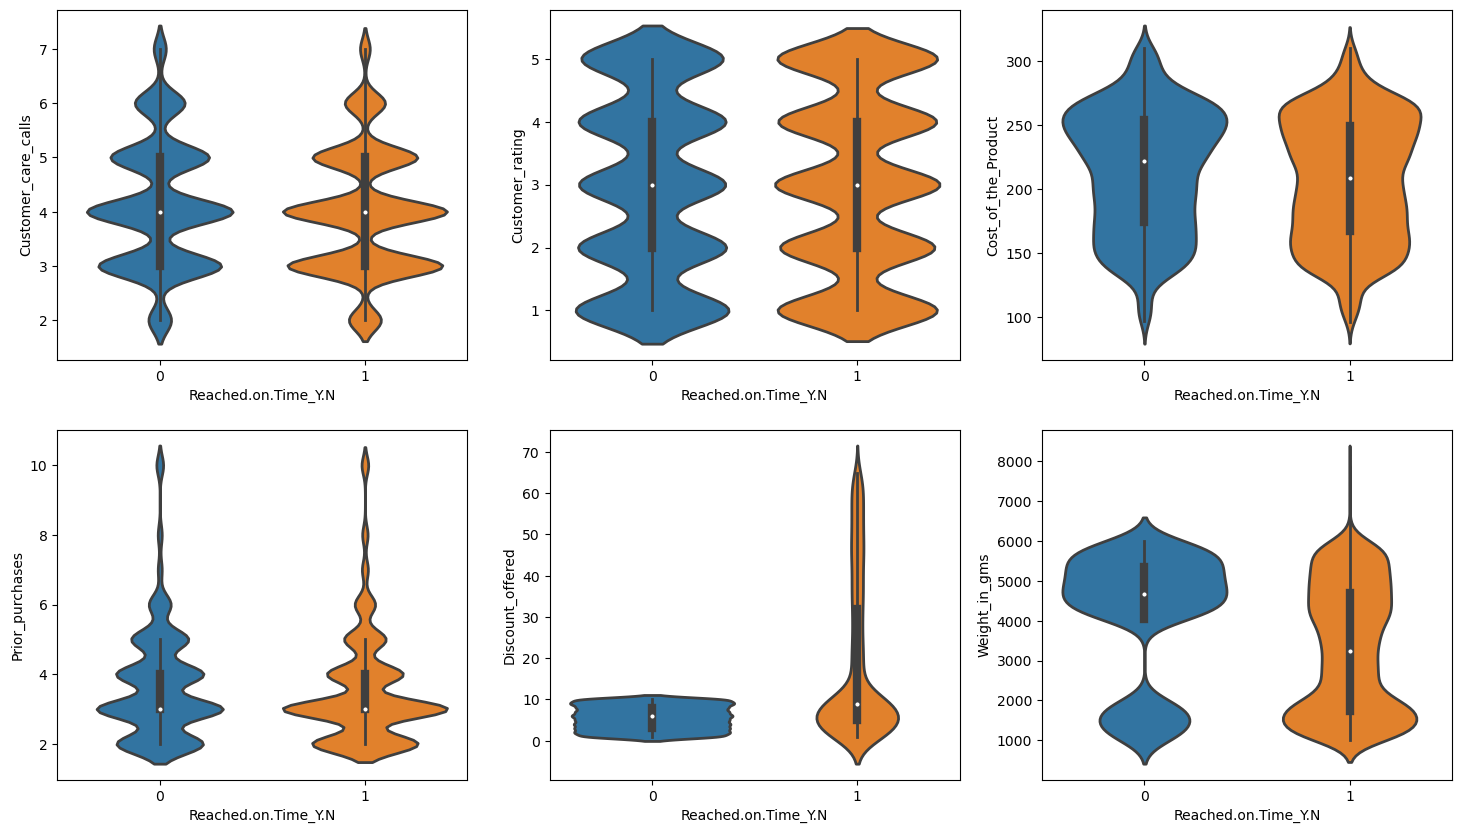

In [11]:
#Unvariat Analysis dengan Violin Plot
import math

plt.figure(figsize=(18, 10))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 3, i+1)
  sns.violinplot(data=df, y=nums[i], x='Reached.on.Time_Y.N', linewidth=2, orient='v')

Berdasarkan violin plot diatas, didapatkan beberapa analisis sebagai berikut<br>
1. Ketepatan waktu pengiriman berdasarkan <b>Panggilan Layanan Pelanggan</b>:<br>
Distribusi jumlah panggilan layanan pelanggan relatif mirip untuk kedua kategori Reached.on.Time_Y.N. Secara umum, distribusi sedikit lebih simetris untuk 1 meskipun rentang jumlah panggilan mirip. Secara grafik, tidak ditemukan data outlier pada variabel ini<br><br>

2. Ketepatan waktu pengiriman berdasarkan <b>Nilai Pelanggan</b>:<br>
Tidak ada perbedaan signifikan dalam distribusi customer rating antara paket yang mencapai tujuan tepat waktu (0) dan yang tidak (1). Distribusi pada keduanya menunjukkan variasi yang sama. Secara grafik, tidak ditemukan data outlier pada variabel ini<br><br>

3. Ketepatan waktu pengiriman berdasarkan <b>Harga Produk</b>:<br>
Distribusi harga produk memiliki pola mirip antara kategori 0 dan 1. Secara grafik, tidak ditemukan data outlier pada variabel ini <br><br>

4. Ketepatan waktu pengiriman berdasarkan <b>Transaksi Sebelumnya</b>:<br>
Jumlah pembelian sebelumnya sedikit lebih bervariasi untuk kategori 0 dibandingkan dengan kategori 1, meskipun perbedaannya tidak terlalu besar. Namun, secara grafik ada beberapa distribusi yang sangat ekor panjang dan diduga terdapat outlier pada variabel ini<br><br>

5. Ketepatan waktu pengiriman berdasarkan <b>Pemberian Diskon</b>:<br>
Distribusi diskon yang ditawarkan jauh lebih lebar untuk kategori 0 dibandingkan 1. Hal ini menunjukkan bahwa diskon yang lebih besar mungkin berhubungan dengan pengiriman yang tepat waktu. Ada beberapa distribusi yang sangat ekor panjang (misalnya pada nilai 1), yang bisa mengindikasikan terdapatnya outlier<br><br>

6. Ketepatan waktu pengiriman berdasarkan <b>Berat Barang</b>:<br>
Distribusi berat barang terlihat berbeda untuk kedua kategori 0 dan 1. Untuk kategori 0 diindikasi terdapat outlier karena titik data yang berada jauh dari box (kotak), terutama di luar whiskers

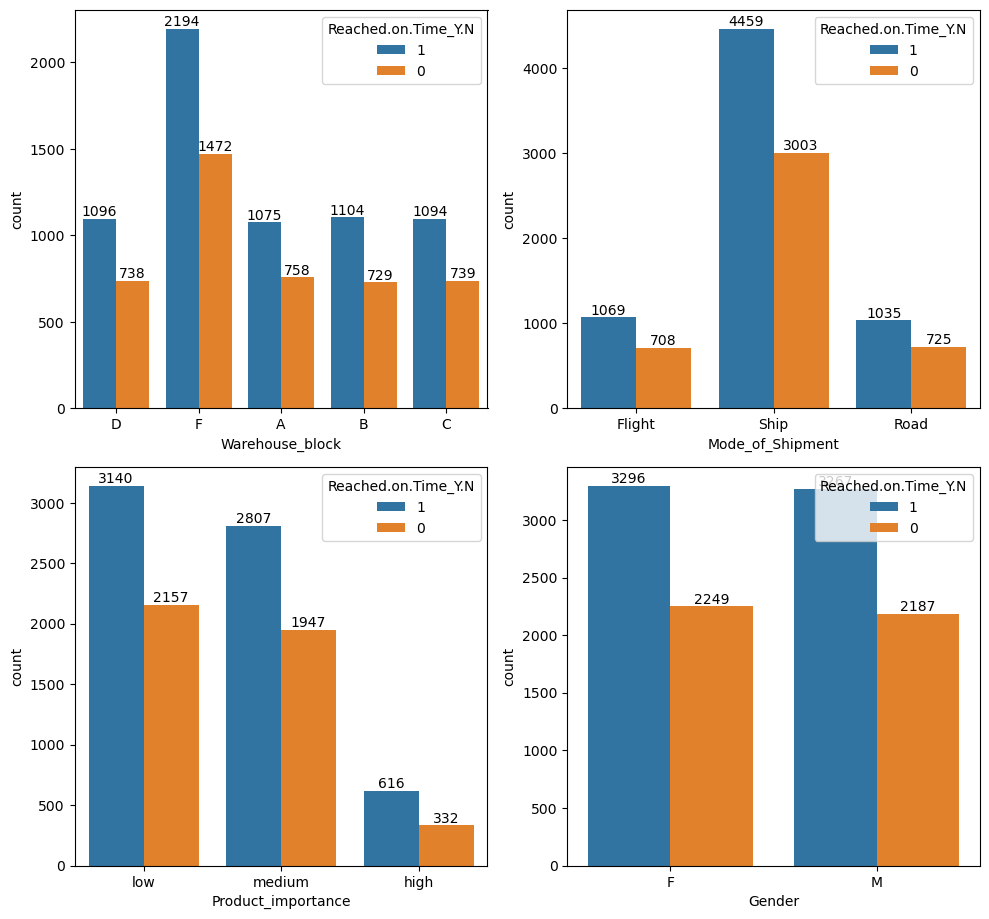

In [12]:
#Unvariat Analysis dengan Bar Plot
# Kolom 'Reached.on.Time_Y.N' diubah dari int64 menjadi string
ontime_string= df['Reached.on.Time_Y.N'].astype(str)
plt.figure(figsize=(10, 18))
for i in range(0, len(cats)):
    plt.subplot(math.ceil(len(cats)/1), 2, i+1)
    ax = sns.countplot(data=df, x=cats[i], hue=ontime_string)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  # Format tanpa desimal
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi untuk menaruh teks
                    ha='center', va='center',  # Alignment horizontal dan vertical
                    xytext=(0, 5),  # Jarak teks dari top bar
                    textcoords='offset points')
plt.tight_layout()

Berdasarkan bar plot diatas, didapatkan beberapa analisis sebagai berikut:<br>
1. Blok Gudang F memiliki keterlambatan paling tinggi, yaitu 2194 pengiriman. Sedangkan Blok Gudang A memiliki keterlambatan paling rendah, yaitu 1075 pengiriman.<br>
2. Blok Gudang F memiliki ketepatan waktu paling tinggi, yaitu 1472 pengiriman. Sedangkan Blok Gudang B memiliki keterlambatan paling rendah, yaitu 729 pengiriman.<br>
3. Mode pengiriman dengan kapal laut memiliki keterlambatan paling tinggi, yaitu 4459 pengiriman. Sedangkan mode pengiriman melalui darat memiliki keterlambatan paling rendah, yaitu 1035 pengiriman<br>
4. Mode pengiriman dengan kapal laut memiliki ketepatan waktu paling tinggi, yaitu 3003 pengiriman. Sedangkan mode pengiriman melalui pesawat memiliki ketepatan waktu paling rendah, yaitu 708 pengiriman<br>
5. Dilihat dari kepentingan suatu produk, kepentingan paling rendah memiliki keterlambatan maupun ketepatan paling tinggi, yaitu dengan 3140 kasus keterlambatan dan 2157 kasus ketepatan waktu.<br>
6. Selain itu, kepentingan paling tinggi justru memiliki keterlambatan maupun ketepatan paling rendah, yaitu dengan 616 kasus keterlambatan dan 332 kasus ketepatan waktu.<br>
7. Berdasarkan jenis kelamin, pelanggan dengan gender wanita mendapatkan kiriman mereka tidak tepat waktu maupun tepat waktu yang tinggi dibanding pria

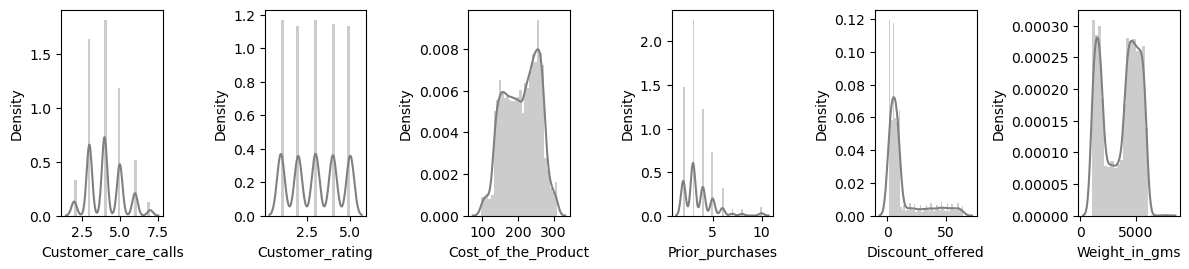

In [13]:
#Unvariat Analysis dengan Density Plot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Berdasarkan density plot diatas, didapatkan beberapa analisis sebagai berikut:<br>
1. Distribusi data berdasarkan <b>Panggilan Layanan Pelanggan</b><br>
Distribusi ini tampak <b>multimodal</b> (memiliki lebih dari satu puncak), dengan puncak utama di sekitar nilai 4 dan 6. Kemungkinan ada beberapa kelompok dalam data ini yang membuat pola distribusinya seperti ini.<br><br>

2. Distribusi data berdasarkan <b>Rating Pelanggan</b><br>
Distribusi rating juga menunjukkan pola <b>multimodal</b>, dengan beberapa puncak yang cukup jelas. Hal ini mengindikasikan bahwa pelanggan memberikan rating yang bervariasi, mungkin berdasarkan pengalaman yang berbeda-beda.<br><br>

3. Distribusi data berdasarkan <b>Harga Barang</b><br>
Distribusi ini mendekati <b>bimodal</b> dengan dua puncak di sekitar harga 100 dan 250-300. Ini bisa mengindikasikan bahwa ada dua kelompok produk dengan harga yang berbeda di dataset ini.<br><br>

4. Distribusi data berdasarkan <b>Transaksi Sebelumnya</b><br>
Distribusi ini juga <b>multimodal</b>, dengan beberapa puncak yang sangat tajam, terutama di sekitar nilai 4 dan 6. Pola ini bisa menunjukkan bahwa pelanggan biasanya melakukan sejumlah pembelian yang tetap.<br><br>

5. Distribusi data berdasarkan <b>Pemberian Diskon</b><br>
Distribusi diskon ini sangat <b>skewed ke kanan</b>, dengan banyak nilai terkonsentrasi di dekat 0 dan sedikit nilai diskon yang sangat tinggi. Ini menunjukkan bahwa mayoritas produk diberikan diskon rendah atau tidak ada diskon, dengan hanya beberapa produk yang mendapatkan diskon besar.<br><br>

6. Distribusi data berdasarkan <b>Berat Barang</b><br>
Distribusi berat produk tampak <b>bimodal</b>, dengan dua puncak utama di sekitar 2000 g dan 5000 g. Hal ini mengindikasikan adanya dua kelompok berat yang berbeda dalam data, mungkin mencerminkan jenis produk yang berbeda. 

<h3>2. Multivariate Analysis

<Axes: >

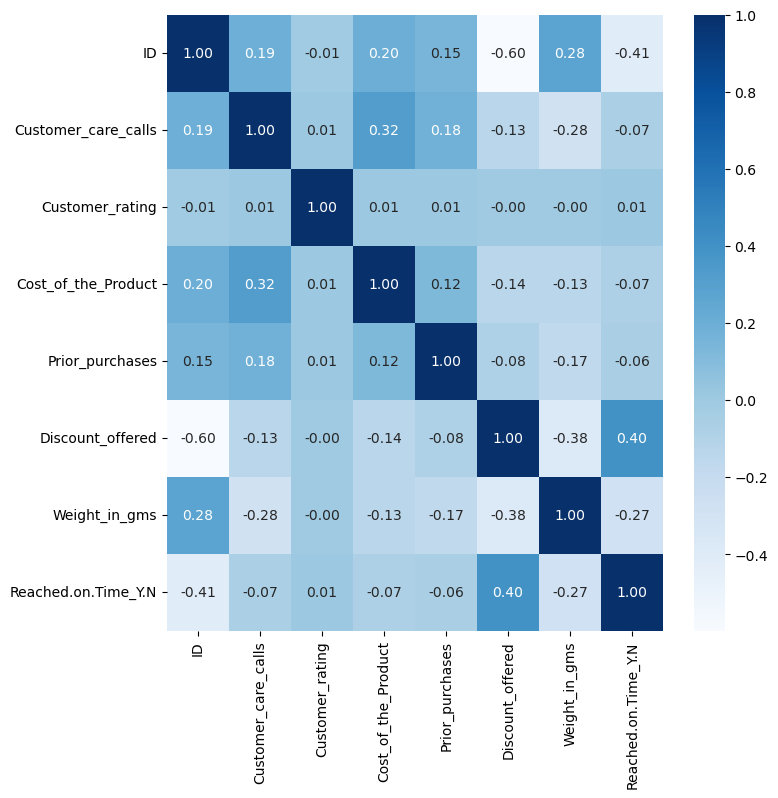

In [14]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 10})

<Figure size 1000x800 with 0 Axes>

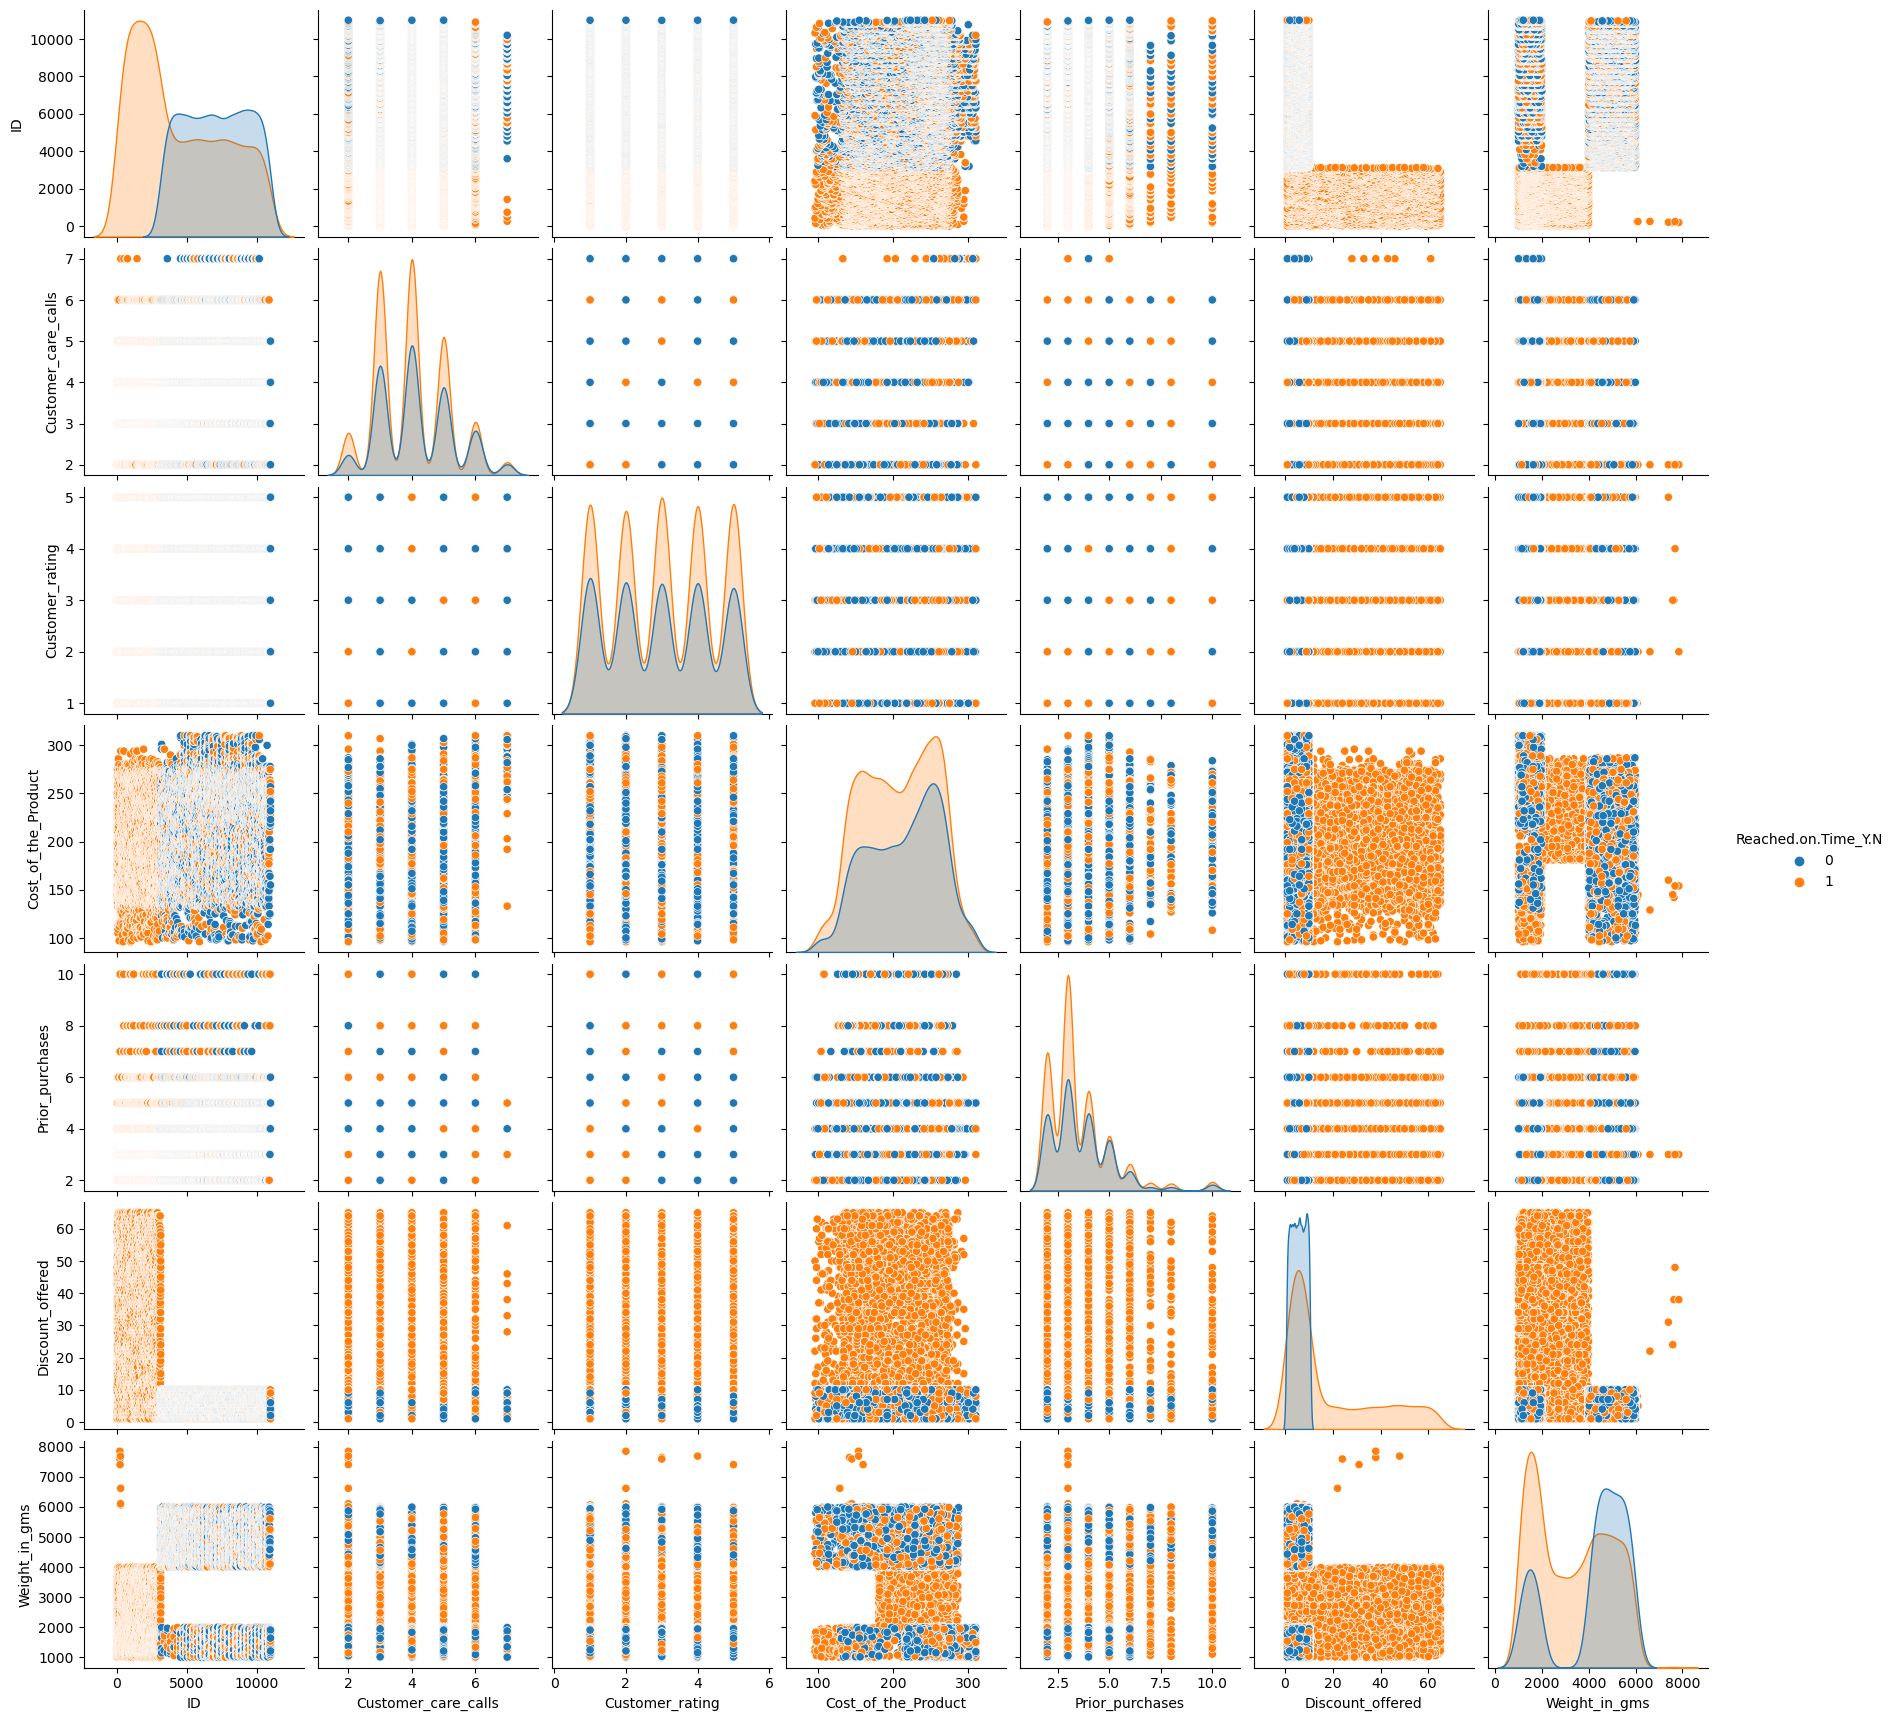

In [15]:
# Pairplot untuk melihat secara visual apakah ada pola yang terbentuk dari interaksi 2 kolom numerik
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

<b>Kesimpulan Unvariate & Multivariate Analysis</b><br>
Berdasarkan dua analisis data diatas, dapat disimpulkan bahwa:
1. Data e-commerce ini memiliki <b>distribusi tidak normal khususnya prior_purchase,discount_offered dan weight_in_gms condong skewed ke kanan</b>. Hal ini akan berdampak pada uji statistik yang tidak valid, algoritma Machine Learning overfit dengan data latih, menyebabkan kesimpulan yang salah jika hanya bergantung pada rata-rata, menyebabkan pemisahan yang tidak proporsional di berbagai kelas histogram, dan membuat analisis visual menjadi menyesatkan. Untuk mengatasi hal ini, <b>data akan ditransformasi menggunakan Transformasi Logaritma agar mengurangi skewness dan mendekatkan data ke distribusi normal.</b><br>
2. Data e-commerce ini masih terdapat <b>data outlier</b> yang dapat mengganggu statistika deskriptif, pemodelan statistik, pengaruh pada Algoritma Machine Learning seperti overfitting dan keakuratannya hingga penarikan kesimpulan yang kurang tepat. Untuk menangani hal tersebut, akan dilakukan <b>pendeteksian dan menghapus outlier dengan Z-Score</b> <br>
3. Data e-commerce ini pun menunjukkan bahwa rata-rata pengiriman barang masih <b>TIDAK TEPAT WAKTU</b>. Hal ini dapat membuat kecewa bagi pelanggan sehingga turunnya rating e-commerce ini yang dapat mengakibatkan dampak buruk yaitu hilangnya kepercayaan pelanggan terhadap e-commerce ini dan jika hal ini terus diulang maka pelanggan tidak akan mempercayai e-commerce ini hingga akhirnya e-commerce ini sepi peminat dan tutup. Untuk mengatasi hal ini, <b>data akan dianalisis lebih dalam dan ditambahkan feature baru kemudian dibuat model prediksi agar dapat meningkatkan ketepatan waktu pengiriman</b><br>
4. Beberapa korelasi antar variabel yang menarik diantaranya:<br>
    a. <b>Customer_care_calls dan Cost_of_the_production</b><br>
    Terdapat korelasi positif sedang antara biaya produk dan panggilan layanan pelanggan <b>(0,32)</b>. Ini dapat mengindikasikan bahwa pelanggan produk yang lebih mahal cenderung lebih sering menghubungi Customer Care.<br>
    b. <b>Customer_care_calls dan prior_purchases</b><br>
    Terdapat korelasi positif sedang antara panggilan layanan pelanggan dengan pembelian sebelumnya <b>(0,18)</b>. Ini dapat mengindikasikan bahwa pelanggan yang suka berbelanja sebelumnya lebih sering menghubungi Customer Care<br>
    c. <b>Weight_in_gms dan Reached.on.Time_Y.N</b><br>
    Terdapat korelasi negatif yang kuat antara berat produk dan apakah produk tersebut tiba tepat waktu <b>(-0,27)</b>. Ini mungkin menunjukkan bahwa produk yang lebih berat cenderung mengalami keterlambatan pengiriman.<br>
    d. <b>Discount_offered dan Reached.on.Time_Y.N</b><br>
    Ada korelasi positif yang kuat antara diskon yang ditawarkan dan apakah produk tersebut tiba tepat waktu <b>(0,40)</b>. Ini mungkin menunjukkan bahwa diskon secara signifikan mempengaruhi terkait dengan waktu pengiriman.


<h2>Keempat - Handle Outlier</h2><br>
Handle outlier atau menangani outlier merupakan langkah penting dalam analisis data, terutama dalam konteks statistika dan machine learning. Outlier adalah titik data yang menyimpang jauh dari mayoritas data lainnya, dan dapat disebabkan oleh berbagai faktor seperti kesalahan pengukuran atau kondisi khusus yang memang berbeda dari data lain. Tujuan dari handle outlier adalah untuk Meningkatkan Akurasi Model, Mendeteksi Kesalahan Data, Menghindari Kesimpulan yang Menyesatkan dan Memastikan Kualitas Data. Langkah untuk menangani outlier adalah sebagai berikut:<br>
1. Transformasi data dengan Transformasi Logaritma<br>
2. Menghapus Outlier dengan Z-Score

<h3>1. Transformasi Logaritma

In [16]:
#Transformasi Logartima untuk kolom prior_purchase,discount_offered dan weight_in_gms
for num in nums:
  if num not in ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product']:
    df[num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2)) # kita harus pastikan data tidak 0 untuk dilogtransform

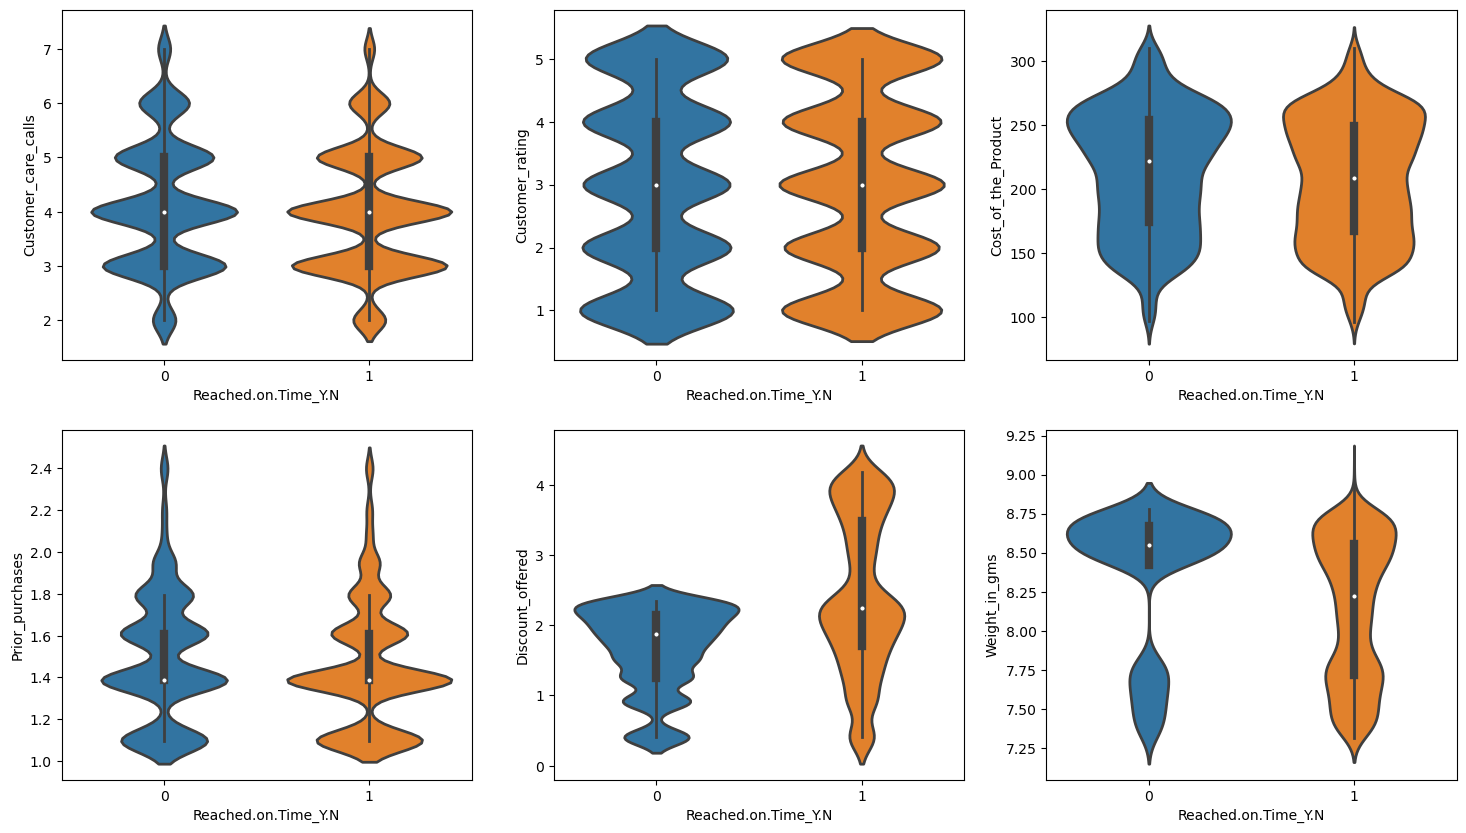

In [17]:
plt.figure(figsize=(18, 10))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 3, i+1)
  sns.violinplot(data=df, y=nums[i], x='Reached.on.Time_Y.N', linewidth=2, orient='v')

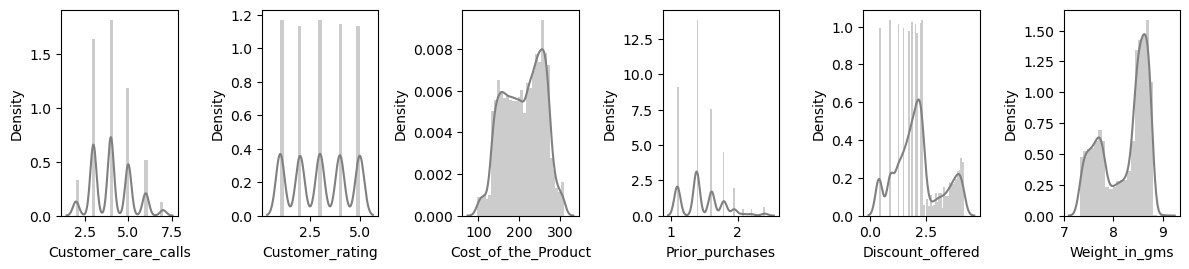

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Setelah dilakukan transformasi logaritma, pada violet plot dan density plot menunjukkan bahwa kolom prior_purchase, discount_offered dan weight_in_gms sudah mendekati distribusi normal.

<h3>2. Z-Score

In [19]:
from scipy import stats

print("Before removing outlier: ", len(df))

for num in nums:
  if num not in ['Customer_rating']:
    z_scores = np.abs(stats.zscore(df[num]))
    df = df[z_scores <= 3]

print("After removing outlier: ", len(df))

Before removing outlier:  10999
After removing outlier:  10821


Setelah dilakukan metode Z-Score, terdapat 178 data berhasil dibuang dari yang semula 10999 data menjadi 10821 data.

<h2> Kelima - Featured Selection</h2><br>
    Dalam penerapan feature selection, kita akan memilih features yang akan dibuang. Pembuangan features ini didasari oleh tingkat korelasi sebuah features yang rendah dengan variabel target (Reached.on.Time_Y.N). Korelasi dilakukan dengan dua cara:<br>
- Korelasi fitur numerik: dengan menggunakan heatmap<br>
- Korelasi fitur kategorikal: dengan menggunakan metode kendall<br>


<b>a. Korelasi Fitur Numerik</b><br>
Berdasarkan heatmap pada multivariate analysis di atas, ada tiga feature yang tidak berkorelasi signifikan dengan fitur lainnya dan juga Reached.on.Time_Y.N yaitu ID dan Prior_Purchases

In [20]:
# 2. Metode Kendall untuk feature kategori
from scipy.stats import kendalltau

# Ambil data categorical saja
fitur_kategori = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
target = 'Reached.on.Time_Y.N'

# Kendalltau
hasil_kendall = {}
for feature in fitur_kategori:
    original_feature = pd.Categorical(df[feature]).codes
    tau, p_value = kendalltau(original_feature, df[target])
    hasil_kendall[feature] = {'Kendall Tau': tau, 'p-value': p_value}

hasil_kendall

{'Warehouse_block': {'Kendall Tau': 0.004006712708027403,
  'p-value': 0.6432043935104634},
 'Mode_of_Shipment': {'Kendall Tau': 0.0002804240747199427,
  'p-value': 0.9758454003139881},
 'Product_importance': {'Kendall Tau': -0.02223850729738633,
  'p-value': 0.01697958856128057},
 'Gender': {'Kendall Tau': 0.005532561881102389,
  'p-value': 0.5649580443493056}}

<b>b. Korelasi Fitur Kategori</b><br>
fitur product importance menunjukkan nilai p-value = 0.016979588~ atau p-value mendekati nol. Sehingga fitur ini menunjukkan <b>tidak ada korelasi signifikan dengan variabel target</b>. Sedangkan untuk fitur lainnya seperti warehouse block, mode of shipment dan gender masih memiliki nilai p-value >0.5 yang berarti <b>memiliki korelasi</b>. Oleh karena itu, fitur yang p-value >0.5 akan tetap disimpan karena kedepannya akan berguna untuk analisis lebih lanjut.

In [21]:
# Feature Selection: Kolom yang ingin dihapus
kolom_dihapus = ['Product_importance', 'ID']

# Membuat DataFrame baru tanpa kolom yang tidak berkorelasi signifikan
df = df.drop(columns=kolom_dihapus)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,1.386294,F,3.795489,7.457898,1
1,F,Flight,4,5,216,1.098612,M,4.085976,8.185490,1
2,A,Flight,2,2,183,1.609438,M,3.881564,8.262172,1
3,B,Flight,3,3,176,1.609438,M,2.351375,7.425060,1
4,C,Flight,2,2,184,1.386294,F,3.839452,8.001188,1


<h2>Keenam - Featured Encoding</h2><br>
Pada data ini, terdapat beberapa kolom yang memiliki jenis data kategori, yaitu Warehouse_block, Mode_of_Shipment, Product_importance dan Gender. Tentu ini akan menyulitkan algoritma Machine Learning karena algoritma hanya dapat bekerja melalui data numerikal. Maka dari itu, setiap kolom tersebut dilakukan "One-Hot Encoding" agar lebih mudah dalam pengerjaannya

In [22]:
df = pd.get_dummies(df, columns=['Warehouse_block','Mode_of_Shipment','Gender'])
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,4,2,177,1.386294,3.795489,7.457898,1,False,False,False,True,False,True,False,False,True,False
1,4,5,216,1.098612,4.085976,8.185490,1,False,False,False,False,True,True,False,False,False,True
2,2,2,183,1.609438,3.881564,8.262172,1,True,False,False,False,False,True,False,False,False,True
3,3,3,176,1.609438,2.351375,7.425060,1,False,True,False,False,False,True,False,False,False,True
4,2,2,184,1.386294,3.839452,8.001188,1,False,False,True,False,False,True,False,False,True,False


<h2> Ketujuh - Split Data</h2><br>
Split data adalah proses membagi dataset menjadi dua atau lebih subset, yang biasanya disebut training set dan test set. Tujuan utama dari pembagian ini adalah untuk melatih model pada satu bagian data (training set) dan menguji kinerjanya pada bagian lain yang tidak digunakan selama pelatihan (test set). Ini memastikan bahwa model dapat menggeneralisasi dengan baik dan tidak hanya bekerja baik pada data yang sudah pernah dilihat (overfitting). Pada kasus ini, <b>80%</b> data didistribusikan untuk <b>Data Latih</b>, sedangkan <b>20%</b> data digunakan untuk <b>Data Uji</b>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Misal kita menggunakan semua kolom kecuali 'Reached.on.Time_Y.N' sebagai fitur
X = df.drop(columns=['Reached.on.Time_Y.N'])  # Fitur (independent variables)
y = df['Reached.on.Time_Y.N']  # Label (dependent variable)

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hasil split
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 8656
Jumlah data test: 2165


<h2> Kedelapan - Featured Transformation</h2><br>
    Featured transformation (transformasi fitur) adalah teknik dalam machine learning dan statistik untuk mengubah fitur data sehingga lebih mudah dianalisis atau digunakan oleh model prediktif. Metode yang digunakan adalah <b>Min-Max Scaling</b> yaitu mengubah data sehingga berada dalam rentang 0-1

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

# Scaling hanya pada training set
X_train = scaler.fit_transform(X_train)

# Scaling pada test set menggunakan parameter dari X_train
X_test = scaler.transform(X_test)

<h2>Kesembilan - Handle Class Imbalance</h2><br>
Handling class imbalance (menangani ketidakseimbangan kelas) adalah langkah penting dalam machine learning ketika satu kelas pada dataset jauh lebih dominan daripada kelas lain. Tujuannya adalah Meningkatkan Akurasi Model pada Kelas Minoritas, Menghindari Prediksi Bias, Meningkatkan Performansi Evaluasi, Mengurangi Overfitting pada Kelas Mayoritas dan Mendukung Keadilan dan Etika dalam Prediksi

In [26]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6461
0    4360
Name: count, dtype: int64

Jika dilihat, maka perbandingan antara Class 0 dan Class 1 adalah 1:1,4. Artinya data tidak terlalu banyak ke salah satu Class. Sehingga tidak perlu menangani Class Imbalance

<h2>Kesepuluh - Feature Extraction</h2>

Merupakan fitur tambahan yang diharapkan untuk mendapatkan fitur baru yang akan di train juga. Untuk mendapatkan Feature Extraction, maka kita dapat mengexplore dari database yang sudah ada. Ada beberapa Freature yang dapat diextraction, diantaranya:<br>
   1. <b>Weight Category</b><br>
   Mengkategorikan berat barang berdasarkan ukuran beratnya. Untuk mengkategorikannya, dibagi menjadi 3 bagian, yaitu:<br>
    a. Ringan = Berat Barang < 2615 gr <br>
    b. Sedang = 2615 gr < Berat Barang < 5.230 gr<br>
    c. Berat = Berat Barang > 5230 gr<br>
   2. <b>Total Customer Care Involvement</b><br>
   Fitur ini mengukur seberapa sering pelanggan menghubungi layanan pelanggan dibanding dengan jumlah pembelian yang sudah mereka lakukan. Pelanggan yang sering menghubungi layanan pelanggan mungkin lebih mengalami masalah dengan pengiriman.<br> Formulanya adalah: <b>Customer_care_calls/Prior_purchases</b><br>
   3. <b>Average Cost per Gram</b><br>
   Fitur ini untuk mengukur harga rata-rata per gram produk. Hal ini berguna apabila produk dengan harga per gram yang lebih tinggi memiliki hubungan dengan keterlambatan pengiriman<br>
   Formulanya adalah: <b>Cost_of_the_product/Weight_in_gms</b><br>
   4. <b>Discount Percentage</b><br>
   Fitur ini memberikan insight tentang seberapa besar diskon yang diberikan sebagai persentase dari harga produk. Produk dengan diskon besar mungkin memiliki pola pengiriman yang berbeda<br>
   Formulanya adalah: <b>(Discount_offered/Cost_of_the_Product)*100</b><br>
   5. <b>Mode of Shipment and Importance Interaction</b><br>
   Interaksi antara metode pengiriman dan pentingnya produk bisa memberikan insight apakah produk penting yang dikirim melalui sebuah transportasi.<br>
   Formulanya adalah: <b>Mode_of_Shipment*Product_Importance</b><br>


In [27]:
#Membaca Data Kedua
df2 = pd.read_csv('Train.csv')
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<h3>1. Weight Category

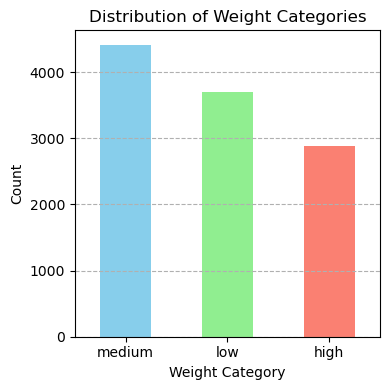

In [28]:
# Define the weight categories based on the given ranges
bins = [df2['Weight_in_gms'].min(), 2500, 5000, df2['Weight_in_gms'].max()]
labels = ['low', 'medium', 'high']

# Create the 'Weight_category' feature
df2['Weight_category'] = pd.cut(df2['Weight_in_gms'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences of each weight category
weight_category_counts = df2['Weight_category'].value_counts()

# Plot the counts of each category
plt.figure(figsize=(4, 4))
weight_category_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
df2['Weight_category'].value_counts()

Weight_category
medium    4412
low       3698
high      2889
Name: count, dtype: int64

<b>a. Biaya Pengiriman Terkait dengan Berat

In [30]:
# Rata-rata biaya produk untuk setiap kategori berat
avg_cost_per_category = df2.groupby('Weight_category')['Cost_of_the_Product'].mean()
print("Rata-rata Biaya Produk Berdasarkan Kategori Berat:")
print(avg_cost_per_category)

Rata-rata Biaya Produk Berdasarkan Kategori Berat:
Weight_category
low       216.363710
medium    210.040571
high      202.541710
Name: Cost_of_the_Product, dtype: float64


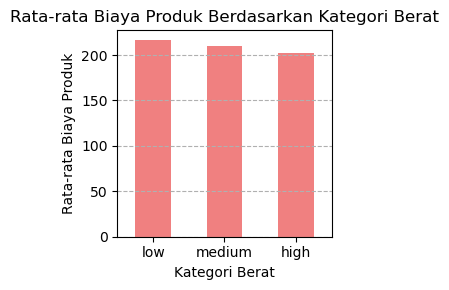

In [31]:
# Rata-rata biaya produk per kategori berat
plt.figure(figsize=(3, 3))
avg_cost_per_category.plot(kind='bar', color='lightcoral')
plt.title('Rata-rata Biaya Produk Berdasarkan Kategori Berat')
plt.xlabel('Kategori Berat')
plt.ylabel('Rata-rata Biaya Produk')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [32]:
avg_cost_per_category

Weight_category
low       216.363710
medium    210.040571
high      202.541710
Name: Cost_of_the_Product, dtype: float64

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode 'weight_category' menjadi numerik
le = LabelEncoder()
df2['weight_category_encoded'] = le.fit_transform(df2['Weight_category'])

In [34]:
# Korelasi antara kategori berat dan biaya produk
correlation_cost = df2['weight_category_encoded'].corr(df2['Cost_of_the_Product'])
print(f"Korelasi antara kategori berat dan biaya produk: {correlation_cost}")

Korelasi antara kategori berat dan biaya produk: 0.05048341414808464


<b>b. Penawaran Diskon Terkait dengan Berat

In [35]:
# Persentase produk yang mencapai tujuan tepat waktu berdasarkan kategori berat
on_time_percentage = df2.groupby('Weight_category')['Reached.on.Time_Y.N'].mean() * 100

print("Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat:")
print(on_time_percentage)

Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat:
Weight_category
low       71.714440
medium    60.698096
high      42.679128
Name: Reached.on.Time_Y.N, dtype: float64


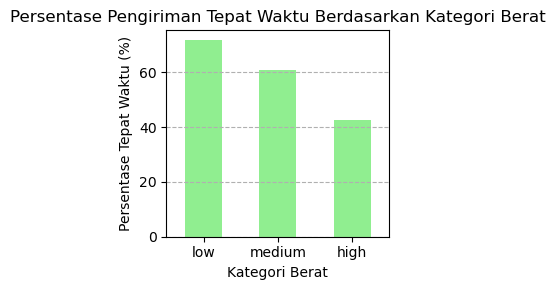

In [36]:
# Persentase produk yang tiba tepat waktu per kategori berat
plt.figure(figsize=(3,3))
on_time_percentage.plot(kind='bar', color='lightgreen')
plt.title('Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat')
plt.xlabel('Kategori Berat')
plt.ylabel('Persentase Tepat Waktu (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [37]:
# Korelasi antara kategori berat dan pengiriman tepat waktu
correlation_on_time = df2['weight_category_encoded'].corr(df['Reached.on.Time_Y.N'])
print(f"Korelasi antara kategori berat dan pengiriman tepat waktu: {correlation_on_time}")

Korelasi antara kategori berat dan pengiriman tepat waktu: 0.1263925739524263


<b>c. Waktu Pengiriman dengan Berat

In [38]:
# Persentase produk yang mencapai tujuan tepat waktu berdasarkan kategori berat
on_time_percentage = df2.groupby('Weight_category')['Reached.on.Time_Y.N'].mean() * 100

print("Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat:")
print(on_time_percentage)

Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat:
Weight_category
low       71.714440
medium    60.698096
high      42.679128
Name: Reached.on.Time_Y.N, dtype: float64


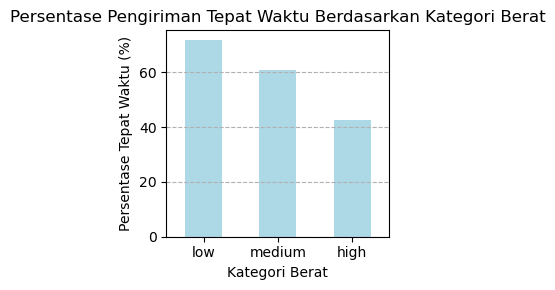

In [39]:
# Persentase produk yang tiba tepat waktu per kategori berat
plt.figure(figsize=(3,3))
on_time_percentage.plot(kind='bar', color='lightblue')
plt.title('Persentase Pengiriman Tepat Waktu Berdasarkan Kategori Berat')
plt.xlabel('Kategori Berat')
plt.ylabel('Persentase Tepat Waktu (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [40]:
# Korelasi antara kategori berat dan pengiriman tepat waktu
correlation_on_time = df2['weight_category_encoded'].corr(df2['Reached.on.Time_Y.N'])
print(f"Korelasi antara kategori berat dan pengiriman tepat waktu: {correlation_on_time}")

Korelasi antara kategori berat dan pengiriman tepat waktu: 0.12378339086576715


<b>d. Metode Pengiriman Terkait dengan Berat

In [41]:
# Distribusi metode pengiriman berdasarkan kategori berat
shipment_mode_distribution = df2.groupby('Weight_category')['Mode_of_Shipment'].value_counts(normalize=True)

print("Distribusi Moda Pengiriman Berdasarkan Kategori Berat:")
print(shipment_mode_distribution)

Distribusi Moda Pengiriman Berdasarkan Kategori Berat:
Weight_category  Mode_of_Shipment
low              Ship                0.681449
                 Flight              0.159275
                 Road                0.159275
medium           Ship                0.667951
                 Flight              0.172031
                 Road                0.160018
high             Ship                0.690550
                 Road                0.160955
                 Flight              0.148494
Name: proportion, dtype: float64


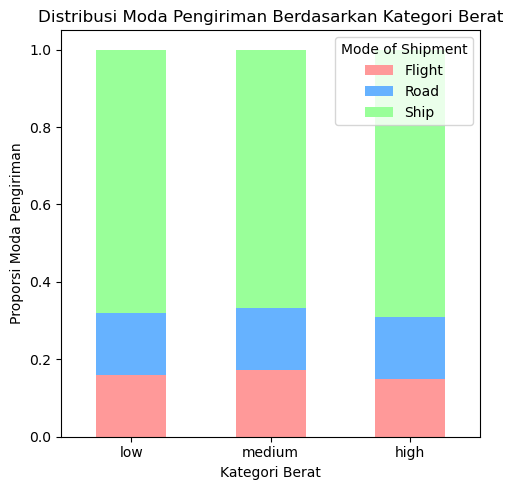

In [42]:
# Distribusi moda pengiriman per kategori berat
shipment_mode_distribution.unstack().plot(kind='bar', stacked=True, figsize=(5, 5), color=['#FF9999','#66B2FF','#99FF99'])
plt.title('Distribusi Moda Pengiriman Berdasarkan Kategori Berat')
plt.xlabel('Kategori Berat')
plt.ylabel('Proporsi Moda Pengiriman')
plt.xticks(rotation=0)
plt.legend(title='Mode of Shipment')
plt.tight_layout()
plt.show()

<b>e. Kesimpulan

Berdasarkan analisis diatas, dapat disimpulkan bahwa:<br>
- Mayoritas produk masuk kedalam kategori medium kemudian diikuti dengan kategori low dan terakhir high. Dari data ini dapat disimpulkan bahwa perusahaan lebih banyak mengirim produk dengan kategori medium yaitu rentang >2500 hingga 5000.
- Produk dengan kategori low menerima rata-rata diskon paling besar, sedangkan produk kategori high menerima diskon paling kecil.
- Produk dengan kategori low memiliki presentase pengiriman tepat waktu tertinggi yaitu >70% sedangkan kategori high memiliki presentase pengiriman tepat waktu terendah yaitu <50%.
- Semua kategori berat memiliki jumlah mode of shipment yang hampir sama, mode paling banyak menggunakan Ship mode kemudian diikuti dengan Flight mode dan terakhi Road mode. Dengan demikian, weight category tidak menentukan jenis pengiriman yang digunakan.


<h3>2. Total Customer Care Involvement

In [43]:
df2['Total_Customer_Service_Involvement'] = df2['Customer_care_calls'] / df2['Prior_purchases']
df2['Total_Customer_Service_Involvement'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df2.dropna(subset=['Total_Customer_Service_Involvement'], inplace=True)

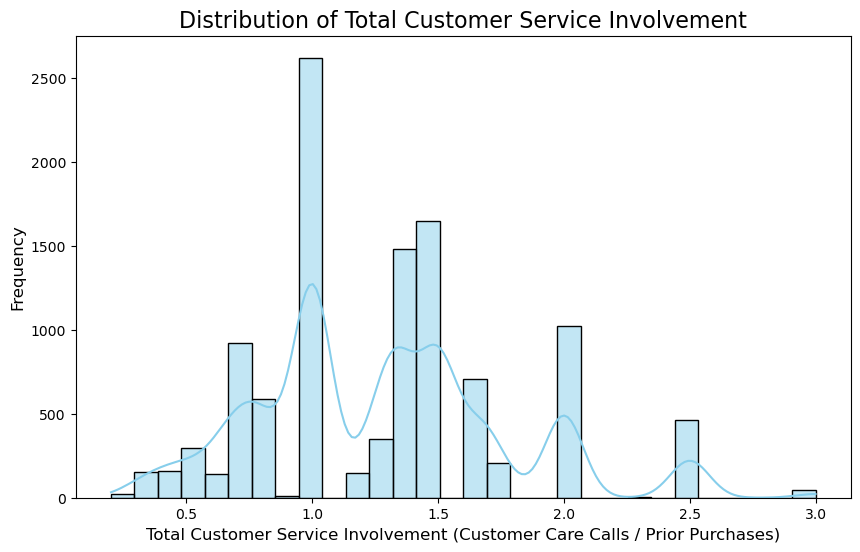

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Total_Customer_Service_Involvement'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Customer Service Involvement', fontsize=16)
plt.xlabel('Total Customer Service Involvement (Customer Care Calls / Prior Purchases)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<b>Kesimpulan

- <b>Keterlibatan Pelanggan Terkonsentrasi di Sekitar Nilai 1</b><br>
Sebagian besar pelanggan memiliki nilai keterlibatan layanan pelanggan sekitar 1, yang berarti jumlah panggilan ke layanan pelanggan sebanding dengan jumlah pembelian sebelumnya. Ini menunjukkan bahwa sebagian besar pelanggan menghubungi layanan pelanggan setelah melakukan beberapa kali pembelian.
- <b>Distribusi Tidak Merata</b><br>
Distribusi keterlibatan pelanggan tidak merata. Ada beberapa puncak (peak) yang menandakan adanya kelompok pelanggan dengan pola keterlibatan yang berbeda-beda.
- <b>Ada Pelanggan dengan Keterlibatan Tinggi</b><br>
Meskipun sebagian besar pelanggan terkonsentrasi di sekitar nilai 1, ada juga kelompok pelanggan dengan nilai keterlibatan yang jauh lebih tinggi (di atas 2). Ini mengindikasikan adanya kelompok pelanggan yang sering menghubungi layanan pelanggan, mungkin karena masalah produk atau layanan yang berulang.

<b>Insight

- <b>Segmen Pelanggan</b><br> 
Perusahaan dapat mengidentifikasi beberapa segmen pelanggan berdasarkan tingkat keterlibatan mereka.
- <b>Penyebab Keterlibatan Tinggi</b><br> 
Perusahaan perlu menyelidiki lebih lanjut mengapa ada kelompok pelanggan dengan nilai keterlibatan yang tinggi. 
- <b>Peningkatan Kepuasan Pelanggan</b><br> 
Dengan memahami pola keterlibatan pelanggan, perusahaan dapat mengambil langkah-langkah untuk meningkatkan kepuasan pelanggan. 
- <b>Program Loyalitas</b><br> 
Perusahaan dapat merancang program loyalitas yang lebih efektif dengan mempertimbangkan tingkat keterlibatan pelanggan.

<h3>3. Average Cost per Gram

In [45]:
df2['Average Cost per Gram'] = df2['Cost_of_the_Product'] / df2['Weight_in_gms']

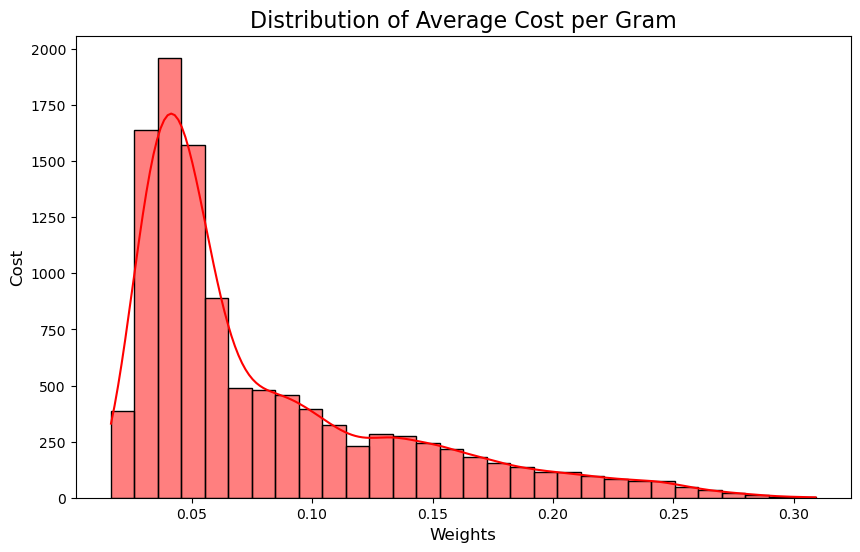

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Average Cost per Gram'], bins=30, kde=True, color='red')
plt.title('Distribution of Average Cost per Gram', fontsize=16)
plt.xlabel('Weights', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.show()

<b>Kesimpulan</b><br>
- Data rata-rata biaya per gram memiliki distribusi yang miring ke kanan, dengan sebagian besar data terkonsentrasi pada rentang berat yang lebih rendah.
- Rata-rata biaya per gram kemungkinan lebih besar daripada median karena pengaruh nilai-nilai ekstrem yang lebih tinggi.
- Data tidak sepenuhnya mengikuti distribusi normal, seperti yang ditunjukkan oleh perbedaan antara histogram dan kurva normal.

<h3>4. Discount Percentage

In [47]:
# Pembuatan feature Discount_Percentage
df2['Discount_Percentage'] = (df2['Discount_offered'] / df2['Cost_of_the_Product']) * 100

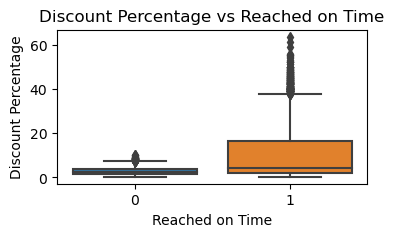

In [48]:
# Box plot
plt.figure(figsize=(4,2))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_Percentage', data=df2)
plt.title('Discount Percentage vs Reached on Time')
plt.xlabel('Reached on Time')
plt.ylabel('Discount Percentage')
plt.show()


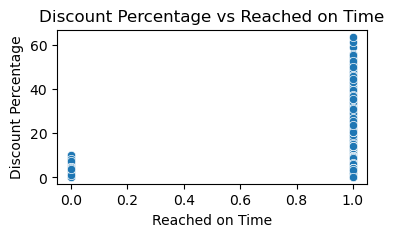

In [49]:
# Scatter plot
plt.figure(figsize=(4,2))
sns.scatterplot(x='Reached.on.Time_Y.N', y='Discount_Percentage', data=df2)
plt.title('Discount Percentage vs Reached on Time')
plt.xlabel('Reached on Time')
plt.ylabel('Discount Percentage')
plt.show()

<b>Kesimpulan</b>

Dari kedua grafik ini, dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan dalam persentase diskon yang diberikan antara pengiriman yang tepat waktu dan yang tidak tepat waktu. Berdasarkan grafik, pengiriman yang tepat waktu cenderung memiliki rentang persentase diskon yang lebih luas dan seringkali lebih tinggi (berkisar di atas 0% hingga di bawah 70%), sedangkan pengiriman yang tidak tepat waktu cenderung mendapatkan persentase diskon yang jauh lebih rendah dan konsisten (di bawah 10%). Dari variasi ketepatan waktu yang ada, bisa menunjukkan bahwa ada faktor lain yang menyebabkan ketepatan waktu pengiriman. Oleh karena itu, pemberian diskon harus dipertimbangkan supaya tidak merugikan biaya pengiriman.<br>

<b>Insight:</b>

1. Pengiriman tidak tepat waktu dengan diskon yang rendah: Variasi persentase diskon yang diberikan pada pengiriman tepat waktu dapat menunjukkan bahwa pengiriman tidak tepat waktu bisa disebabkan faktor lain seperti faktor logistik atau geografis.
2. Prioritas pemberian diskon untuk pengiriman tepat waktu: Prioritas pemberian diskon bisa dipertimbangkan kembali dengan mempertimbangkan faktor lainnya seperti faktor logistik ataupun geografis karena mempengaruhi biaya pengiriman. Prioritas diskon ini diperlukan supaya pemberian diskon memberikan keuntungan yang sebanding dengan pengeluaran biaya pengiriman yang dilakukan.
3. Pengiriman tepat waktu dengan diskon yang lebih tinggi: Jika perusahaan melihat bahwa memberikan diskon lebih tinggi memang dapat meningkatkan kepuasan pelanggan dan mendorong loyalitas, strategi ini bisa dipertahankan atau bahkan ditingkatkan. 

<h3>5. Mode of Shipment and Importance Interaction

In [50]:
# Mapping kategori ke nilai numerik
importance_map = {'low': 1, 'medium': 2, 'high': 3}
df2['Product_importance_numeric'] = df2['Product_importance'].map(importance_map)

Korelasi antara Cost_of_the_Product dan Product_importance_numeric: -0.04678859002171707


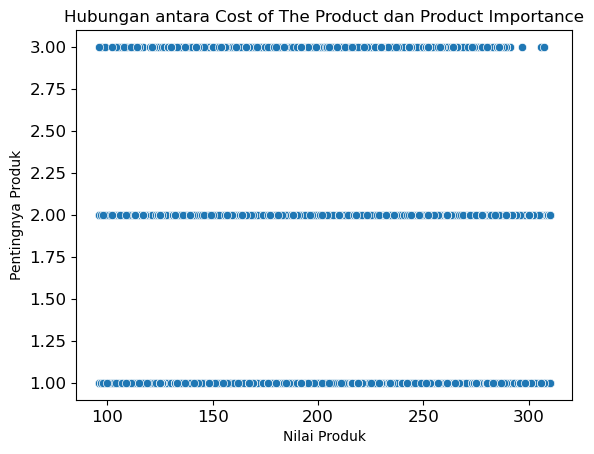

In [51]:
# Hitung korelasi dan Visualisasi menggunakan scatter plot
correlation = df2['Cost_of_the_Product'].corr(df2['Product_importance_numeric'])
print("Korelasi antara Cost_of_the_Product dan Product_importance_numeric:", correlation)
# Visualisasi Scatter Plot
sns.scatterplot(x='Cost_of_the_Product', y='Product_importance_numeric', data=df2)
plt.title('Hubungan antara Cost of The Product dan Product Importance')
plt.xlabel('Nilai Produk')
plt.ylabel('Pentingnya Produk')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<b>Kesimpulan</b>

- Nilai korelasi yang dapatkan (-0.04678859002171707) menunjukkan bahwa hampir tidak ada hubungan linear antara harga produk dan tingkat kepentingannya. 
- Titik-titik data tersebar secara acak, menunjukkan tidak ada pola yang jelas antara harga dan tingkat kepentingan. Tidak ada hubungan linear yang signifikan antara harga produk dan tingkat kepentingan produk. 
- Artinya, kenaikan atau penurunan harga produk tidak secara langsung mempengaruhi persepsi pelanggan terhadap pentingnya produk tersebut.

<b>Insight</b>
- Harga bukan satu-satunya penentu: Harga hanyalah salah satu dari banyak faktor yang dipertimbangkan oleh konsumen dalam membuat keputusan pembelian. Faktor-faktor non-moneter seringkali memiliki bobot yang lebih besar<b>
- Pentingnya segmentasi pasar: Mungkin ada segmen pasar tertentu yang lebih sensitif terhadap harga dibandingkan segmen lainnya. Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi segmen-segmen ini.

In [52]:
df2['Shipment_Importance'] = df2['Mode_of_Shipment'] + '_' + df2['Product_importance']
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Weight_category,weight_category_encoded,Total_Customer_Service_Involvement,Average Cost per Gram,Discount_Percentage,Product_importance_numeric,Shipment_Importance
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,low,1,1.333333,0.143552,24.858757,1,Flight_low
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,medium,2,2.000000,0.069948,27.314815,1,Flight_low
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,medium,2,0.500000,0.054238,26.229508,1,Flight_low
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,low,1,0.750000,0.149533,5.681818,2,Flight_medium
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,low,1,0.666667,0.074074,25.000000,2,Flight_medium


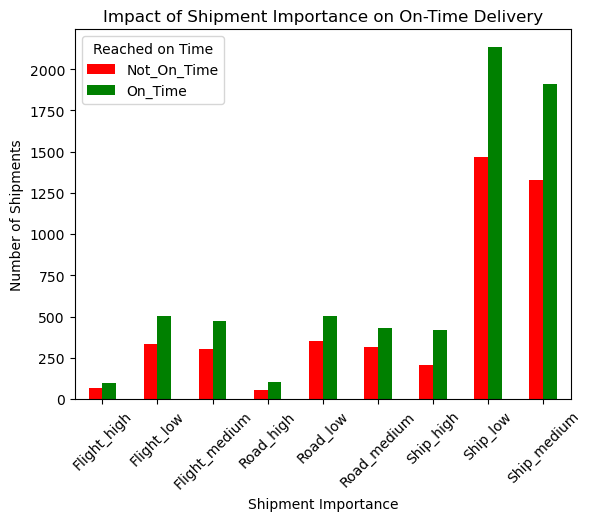

In [53]:
# Menghitung distribusi berdasarkan 'Shipment_Importance' dan 'Reached.on.Time_Y.N'
shipment_impact = df2.groupby(['Shipment_Importance', 'Reached.on.Time_Y.N']).size().unstack(fill_value=0)
shipment_impact.columns = ['Not_On_Time', 'On_Time']

# Menampilkan bar chart
shipment_impact.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Impact of Shipment Importance on On-Time Delivery')
plt.xlabel('Shipment Importance')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(title='Reached on Time')
plt.show()

Insight:
1. Pertimbangkan untuk mengoptimalkan rute dan pengelolaan sumber daya: untuk pengiriman melalui jalan guna meningkatkan tingkat ketepatan waktu.
2. Pemanfaatan moda: Dalam hal ini pengiriman kepentingan tingkat tinggi dapat memanfaatkan moda yang tidak memiliki kuota yang padat dan waktu pengiriman yang cepat, seperti moda pesawat.
3. Evaluasi strategi untuk kepuasan pelanggan: Sebaiknya dilakukan evaluasi kembali untuk pengiriman dengan kepentingan rendah melalui kapal, karena rasio tidak tepat waktu lebih tinggi dibandingkan yang tepat waktu. Hal ini akan mempengaruhi kepuasan pelanggan juga.